1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import seaborn as sns 
from scipy.stats import norm

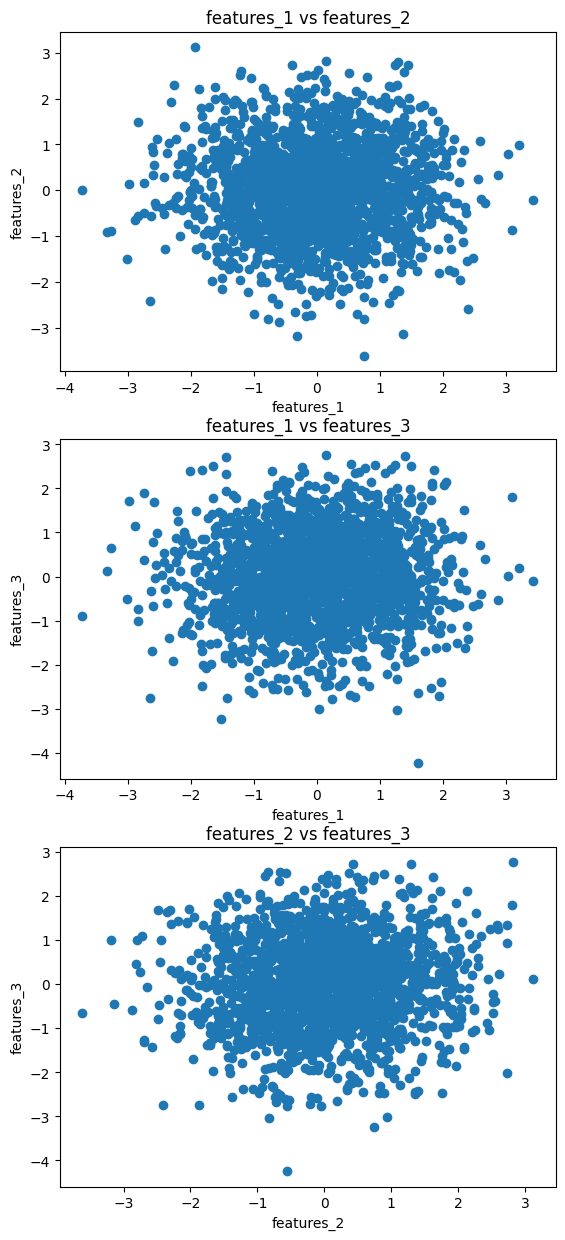

            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


In [156]:
def scatter_plot(feature_i, feature_j):
    plt.scatter(df_reg[feature_i], df_reg[feature_j])
    plt.xlabel(feature_i)
    plt.ylabel(feature_j)
    plt.title(f"{feature_i} vs {feature_j}")

def check_corr(features, data):
    corr_matrix =  data[features].corr()
    return corr_matrix

url = 'https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv?dl=1'
df_reg = pd.read_csv(url)

features = ['features_1', 'features_2', 'features_3']

plt.figure().set_figheight(15)
plt.subplot(3,1,1)
scatter_plot(features[0], features[1])

plt.subplot(3,1,2)
feature_1_3 = scatter_plot(features[0], features[2])

plt.subplot(3,1,3)
feature_2_3 = scatter_plot(features[1], features[2])
plt.show()
correlation_matrix = check_corr(features, df_reg)
print(correlation_matrix)

#From the scatter plot one can tell that the features are not correlated, because they do not have a linear trend. 
#Also the correlation matrix tells us that they are not correlated because the correlation between the features are far from 1. 

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [157]:
#from IPython.display import Image
#Image('images/two_categories_scatter_plot.png')

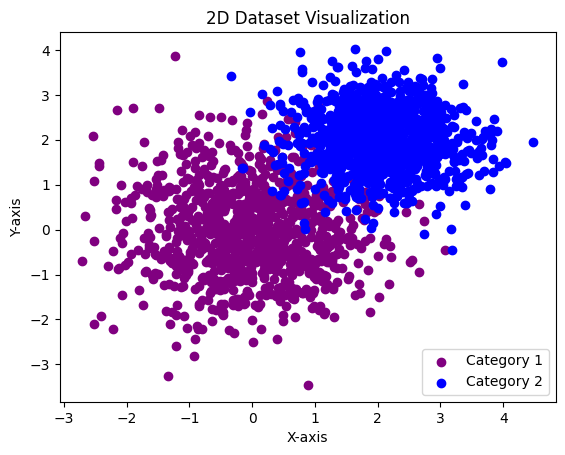

In [158]:
def make_2D_dataset(mean_category1, mean_category2, cov_category1, cov_category2, size):
    category1 = np.random.multivariate_normal(mean=mean_category1, cov=cov_category1, size=size)
    category2 = np.random.multivariate_normal(mean=mean_category2, cov=cov_category2, size=size)
    return category1, category2

mean_category1 = [0, 0]  
mean_category2 = [2, 2] 
cov_category1 = [[1, 0], [0, 1]] 
cov_category2 = [[0.5, 0], [0, 0.5]]  
size = 1000

category1_data, category2_data = make_2D_dataset(mean_category1, mean_category2, cov_category1, cov_category2, size)

plt.scatter(category1_data[:, 0], category1_data[:, 1], label='Category 1', color='purple') #take each column 
plt.scatter(category2_data[:, 0], category2_data[:, 1], label='Category 2', color='blue')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Dataset Visualization')
plt.legend()
plt.show()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

       residuals  distances
0       1.100000       16.0
1      -1.950000        6.3
2      -7.200000        3.4
3      -4.150000        8.4
4      -6.590000        1.7
...          ...        ...
11126  -0.760000       14.4
11127   0.380000        7.5
11128   0.083333        1.7
11129   0.166667       19.1
11130   0.083333        2.6

[11131 rows x 2 columns]


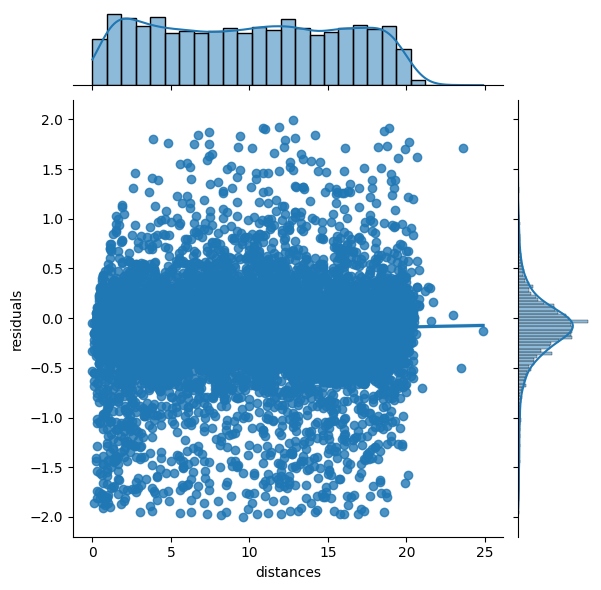

The correlation matrix: 
            residuals  distances
residuals   1.000000   0.043404
distances   0.043404   1.000000 



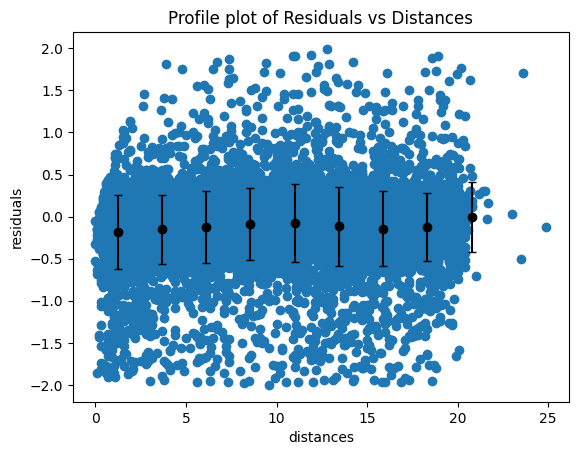

In [159]:
pickle_data = pd.read_pickle('residuals_261.pkl')
pickle_df = pd.DataFrame(pickle_data.flatten()[0])
print(pickle_df)
filtered_df = pickle_df[abs(pickle_df['residuals']) < 2]

sns.jointplot(x='distances', y='residuals', data=filtered_df, kind='reg')
plt.show()
features_pickle = ['residuals', 'distances']

corr_matrix = check_corr(features_pickle, filtered_df)
print(f'The correlation matrix: \n {corr_matrix} \n')

bins = np.linspace(0, 22, 10)
filtered_df = filtered_df.copy()  # Make a copy of the DataFrame to avoid warnings
filtered_df.loc[:, 'bin'] = pd.cut(filtered_df['distances'], bins=bins)
bin_centers = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]

binned = filtered_df.groupby('bin')['residuals']
result = binned.agg(['mean', 'std'])  # Calculate mean and standard deviation
result['distances'] = bin_centers
result['yerr'] = result['std']  

plt.scatter(filtered_df['distances'], filtered_df['residuals'])
plt.xlabel('distances')
plt.ylabel('residuals')
plt.title('Profile plot of Residuals vs Distances')

plt.errorbar(
    result['distances'],
    result['mean'],
    yerr=result['yerr'],  # yerr for vertical error bars
    fmt='o',
    linestyle='None',
    capsize=3,
    color='black',
)

plt.show()


4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


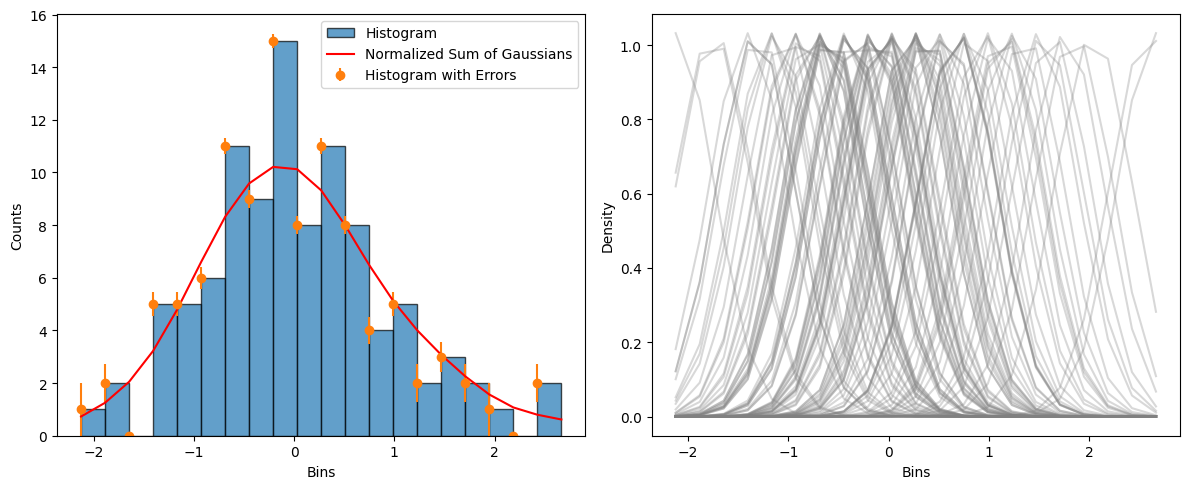

In [160]:
N = 100
mean = 0
std = 1
x = np.random.normal(mean, std, N)

plt.figure(figsize=(12, 5))

num_bins = 20

# Plotting histogram with errors
plt.subplot(121)

counts, bins, _ = plt.hist(x, bins=num_bins, alpha=0.7, label='Histogram', edgecolor='black')
#to avoid runtimewarning with 1/0
errors = np.zeros_like(counts)
nonzero_mask = counts > 0
errors[nonzero_mask] = 1 / np.sqrt(counts[nonzero_mask]) # Calculate Poisson uncertainty

plt.errorbar(bins[:-1], counts, yerr=errors, fmt='o', label='Histogram with Errors')
plt.ylabel('Counts')
plt.xlabel('Bins')
plt.gca().get_yaxis().set_major_locator(plt.MaxNLocator(integer=True))  # Set y axis major ticks as integers
plt.legend()

# standard deviation for Gaussian functions
default_std = 1.06 * x.std() * x.size**(-1/5)

# Create Gaussian functions for each element in x
gaussian_sum = np.zeros_like(bins)

# Plot Gaussian functions
plt.subplot(122)
plt.ylabel('Density')
plt.xlabel('Bins')

for data_point in x:
    # Create a Gaussian for each data point in x
    gaussian = norm.pdf(bins, data_point, default_std)
    plt.plot(bins, gaussian, color='gray', alpha=0.3)

    # Accumulate Gaussians
    gaussian_sum += gaussian

# Normalize the sum of Gaussians
integral_histogram = np.trapz(counts, bins[:-1])  # Integral of original histogram
integral_gaussian = np.trapz(gaussian_sum, bins)  # Integral of sum of Gaussians

# Normalize sum of Gaussians to match integral of original histogram
gaussian_sum *= integral_histogram / integral_gaussian

# Plot the normalized sum of Gaussians on top of the histogram
plt.subplot(121) 
plt.plot(bins, gaussian_sum, label='Normalized Sum of Gaussians', color='red')
plt.legend()
plt.tight_layout()
plt.show()

